# PCA – Dimensionality Reduction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt

from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
digits = load_digits()

X = digits.data      
y = digits.target    

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (1797, 64)
Shape of y: (1797,)


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [4]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
components = [2, 10, 30, 50]
explained_variance = {}

for n in components:
    pca = PCA(n_components=n)
    pca.fit(X_train_scaled)
    explained_variance[n] = np.sum(pca.explained_variance_ratio_)

In [6]:
for k, v in explained_variance.items():
    print(f"PCA with {k} components explains {v:.2f} variance")

PCA with 2 components explains 0.22 variance
PCA with 10 components explains 0.59 variance
PCA with 30 components explains 0.89 variance
PCA with 50 components explains 0.98 variance


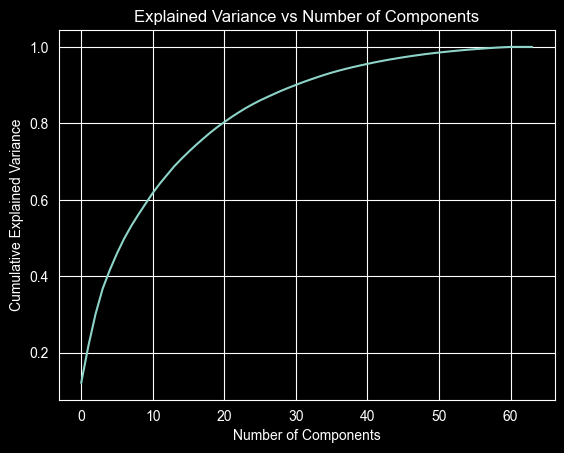

In [7]:
pca_full = PCA()
pca_full.fit(X_train_scaled)

cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure()
plt.plot(cumulative_variance)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs Number of Components")
plt.show()

In [8]:
pca = PCA(n_components=30)

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("Reduced Train Shape:", X_train_pca.shape)
print("Reduced Test Shape:", X_test_pca.shape)

Reduced Train Shape: (1437, 30)
Reduced Test Shape: (360, 30)


In [9]:
lr_original = LogisticRegression(max_iter=1000)
lr_original.fit(X_train_scaled, y_train)

y_pred_original = lr_original.predict(X_test_scaled)
acc_original = accuracy_score(y_test, y_pred_original)

print("Accuracy without PCA:", acc_original)

Accuracy without PCA: 0.9722222222222222


In [10]:
lr_pca = LogisticRegression(max_iter=1000)
lr_pca.fit(X_train_pca, y_train)

y_pred_pca = lr_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test, y_pred_pca)

print("Accuracy with PCA:", acc_pca)

Accuracy with PCA: 0.9555555555555556


In [11]:
accuracy_df = pd.DataFrame({
    "Model": ["Without PCA", "With PCA (30 components)"],
    "Accuracy": [acc_original, acc_pca]
})

accuracy_df

,Model,Accuracy
0,Without PCA,0.972222
1,With PCA (30 components),0.955556


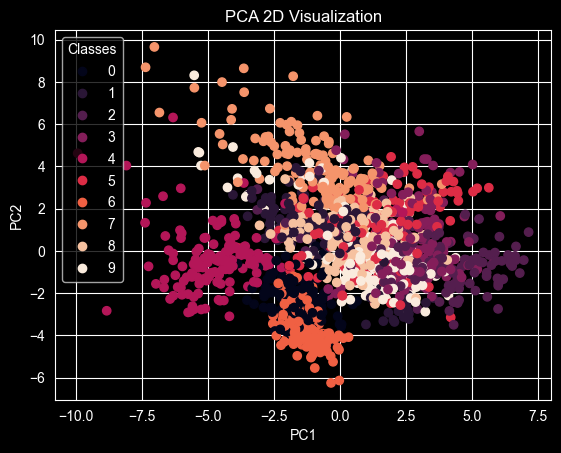

In [12]:
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_train_scaled)

plt.figure()
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_train)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA 2D Visualization")
plt.legend(*scatter.legend_elements(), title="Classes")
plt.show()